### Identificar fronteras lo lineales

In [105]:
%config IPCompleter.greedy=True
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from scipy import stats
#Graficos con Seaborn
import seaborn as sns; sns.set()
style.use('ggplot')
from sklearn import svm
from sklearn.datasets.samples_generator import make_circles, make_blobs


In [141]:
X,Y= make_circles(100, factor= .1, noise=.1)


In [142]:
def plot_svc(model, ax=None, plot_support=True):
    """ Plot de la función de decisión para una clasificación en 2D con SVC"""
    if ax is None:
        ax = plt.gca()
    xlim=ax.get_xlim()
    ylim=ax.get_ylim()
    ## Genramos la parrilla de puntos para evaluar el Modelo
    
    ### Muestra 30 puntos
    xx= np.linspace(xlim[0], xlim[1],30)
    yy= np.linspace(ylim[0], ylim[1],30)
    Y,X=np.meshgrid(yy,xx)
    
    #TUpla T
    #xy=np.vstack([X.ravel(), Y.ravel()]).T
    xy=tuple(np.vstack([X.ravel(), Y.ravel()]))
    P = model.decision_function(xy).reshape(X.shape)
    
        ## Representamos las fronteras y los margenes del SVC
    ax.contour(X,Y,P, colors="k", levels= [-1,0,1] , alpha=0.5, linestyles=["--","-", "--"])
    #print("Vectores de soporte:")
    #print(model.support_vectors_)
    if plot_support:
        ax.scatter(model.support_vectors_[:,0], 
                   model.support_vectors_[:,1],
                   s=100, linewidth=1, facecolors="black")
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
        

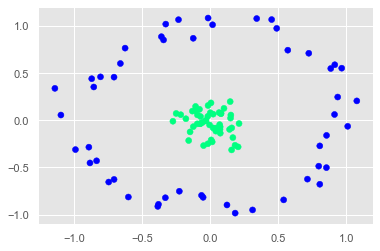

In [157]:
plt.scatter(X[:,0],X[:,1], c=Y, cmap="winter")

In [144]:
#Alturas de los puntos para verlos en 3D
r=np.exp(-(X**2).sum(1))
r

array([0.28859094, 0.99349421, 0.97811931, 0.32924597, 0.36732039,
       0.5115742 , 0.99794361, 0.99130536, 0.95436573, 0.93973228,
       0.35993326, 0.48465758, 0.97045792, 0.27699768, 0.43128481,
       0.2597245 , 0.41693118, 0.99665496, 0.9403748 , 0.98988158,
       0.36666593, 0.92858963, 0.30472264, 0.4681448 , 0.92835557,
       0.45066171, 0.98549868, 0.99385541, 0.9753888 , 0.98879643,
       0.99343601, 0.93190518, 0.9759118 , 0.40580856, 0.9951724 ,
       0.94011813, 0.97369557, 0.99762218, 0.41061104, 0.9851434 ,
       0.97406231, 0.30315813, 0.39180207, 0.9675544 , 0.98070047,
       0.90120562, 0.38664719, 0.29930835, 0.37430261, 0.31739905,
       0.46176706, 0.41458035, 0.37501224, 0.96417096, 0.42559325,
       0.93508177, 0.99358244, 0.37392521, 0.35775375, 0.35774576,
       0.99301147, 0.35587749, 0.42319834, 0.88361331, 0.97367757,
       0.95150475, 0.49307107, 0.36596767, 0.30802408, 0.98825145,
       0.415314  , 0.98980469, 0.9990813 , 0.98801935, 0.98876

In [145]:
from  mpl_toolkits import mplot3d
def plot_3d(elev=30, azim=30, X=X,Y=Y, r=r):
    ax=plt.subplot(projection="3d")
    ax.scatter3D(X[:,0], X[:,1],r, c=Y, s=50, cmap="winter")
    ax.view_init(elev=elev, azim=azim)
    
    ax.set_xlabel("x[0]")
    ax.set_ylabel("y[1]")
    ax.set_zlabel("r")

In [146]:
from ipywidgets import interact, fixed

In [147]:
interact(plot_3d, elev=[-180,-150, -120, -90,-60,-30,0, 30,60,90,120,150,180], azim=[-180,-150, -120, -90,-60,-30,0, 30,60,90,120,150,180], X=fixed(X), Y=fixed(Y), r=fixed(r))

interactive(children=(Dropdown(description='elev', index=7, options=(-180, -150, -120, -90, -60, -30, 0, 30, 6…

<function __main__.plot_3d(elev=30, azim=30, X=array([[ 0.96783958,  0.55320119],
       [ 0.0023046 ,  0.08075727],
       [-0.10715331,  0.10315905],
       [ 0.80677955, -0.67827497],
       [ 0.31287731, -0.95059381],
       [-0.05041754, -0.81714179],
       [-0.01593941,  0.04247877],
       [ 0.04464631, -0.08209361],
       [ 0.21345156, -0.03386366],
       [-0.01559013, -0.24883166],
       [-0.59968651, -0.81376456],
       [ 0.80671517, -0.27115178],
       [ 0.14383784, -0.09642567],
       [ 0.3433448 ,  1.0797502 ],
       [ 0.91496514,  0.06184984],
       [ 0.4531815 ,  1.06899971],
       [ 0.79896745, -0.48629736],
       [-0.05361418, -0.02182133],
       [ 0.14827686,  0.19872276],
       [-0.09367862, -0.03734007],
       [ 0.18495751, -0.98442614],
       [-0.04716794, -0.26807378],
       [ 0.91685821,  0.58968152],
       [ 0.85639598, -0.15988602],
       [-0.27247726, -0.00982888],
       [-0.65848035,  0.60286147],
       [ 0.07369911, -0.0957911 ],
       [

In [148]:
# Sckit Learn cambiar del linear al Radial para buscar formas circulares

In [149]:
from sklearn.svm import SVC
rbf= SVC(kernel="rbf", C=1E6)


In [154]:
def plt_svc(model, ax=None, plot_support=True):
    """ Plot de la función de decisión para una clasificación en 2D con SVC"""
    if ax is None:
        ax = plt.gca()
    xlim=ax.get_xlim()
    ylim=ax.get_ylim()
    ## Genramos la parrilla de puntos para evaluar el Modelo
    
    ### Muestra 30 puntos
    xx= np.linspace(xlim[0], xlim[1],30)
    yy= np.linspace(ylim[0], ylim[1],30)
    Y,X=np.meshgrid(yy,xx)
    
    #TUpla T
    xy=np.vstack([X.ravel(), Y.ravel()]).T
    #xy=(np.vstack([X.ravel(), Y.ravel()])).T
    P = model.decision_function(xy).reshape(X.shape)
    
        ## Representamos las fronteras y los margenes del SVC
    ax.contour(X,Y,P, colors="k", levels= [-1,0,1] , alpha=0.5, linestyles=["--","-", "--"])
    #print("Vectores de soporte:")
    #print(model.support_vectors_)
    if plot_support:
        ax.scatter(model.support_vectors_[:,0], 
                   model.support_vectors_[:,1],
                   s=100, linewidth=1, facecolors="red")
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
def plot_svm(N=10, ax=None):
    X,Y =make_blobs(n_samples=500, centers=2, random_state=0, cluster_std=0.6)
    X= X[:N]
    Y= Y[:N]
    model= SVC(kernel="rbf", C= 1E10)
    model.fit(X,Y)
        
    ax= ax or plt.gca()
    ax.scatter(X[:,0], X[:,1] , c=Y, s=50, cmap="summer")
    ax.set_xlim=(-1,4)
    ax.set_ylim=(-1,6)
    plot_svc(model, ax)
    


ValueError: X.shape[1] = 900 should be equal to 2, the number of features at training time

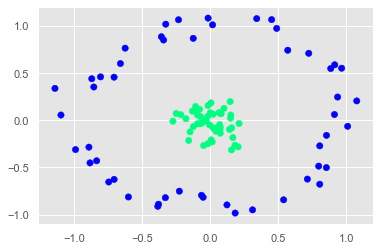

In [156]:
rbf.fit(X,Y)

plt.scatter(X[:,0],X[:,1], c=Y, cmap="winter", s=40)
plot_svc(rbf)
#plt.scatter(rbf.support_vectors_[:,0], rbf.support_vectors_[:,1], s=200, lw=1, facecolors=None, cmap="summer")


In [134]:
## AJustar parametros de SVM


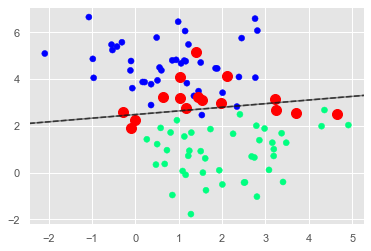

In [102]:
X,Y= make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.2)
# En estos casos se ajusta el Margen par relajar el algoritmo
plt.scatter(X[:,0],X[:,1], c=Y, cmap="winter")
model=SVC(kernel="linear",  C=100000000)
model.fit(X,Y)
plt_svc(model)

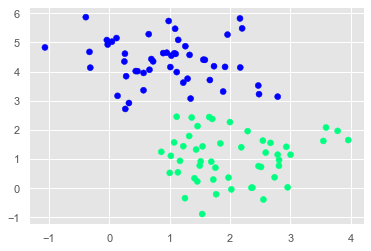

In [86]:
X,Y= make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)
plt.scatter(X[:,0],X[:,1], c=Y, cmap="winter")
model=SVC(kernel="linear",  C=C)

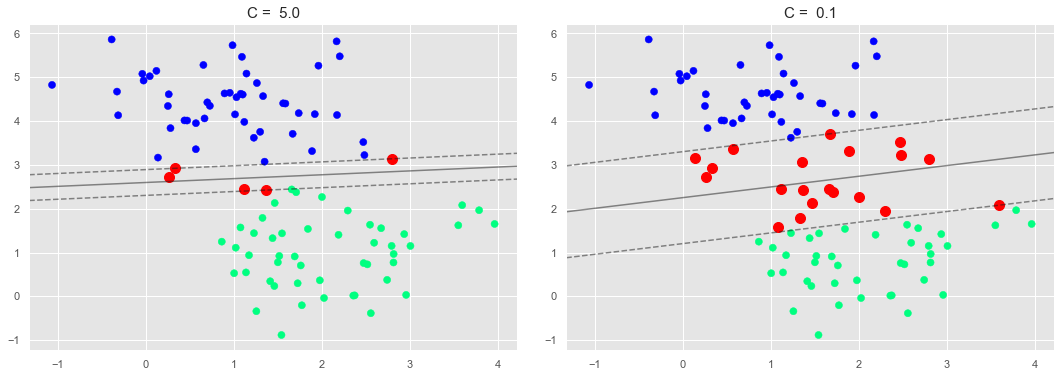

In [94]:
fig, ax= plt.subplots(1,2, figsize=(16,6))
fig.subplots_adjust(left=0.06, right=0.95, wspace=0.1)
for ax_i, C in zip(ax, [5.0,0.1]):
    model=SVC(kernel="linear",  C=C)
    model.fit(X,Y)
    ax_i.scatter(X[:,0],X[:,1], c=Y, s=50, cmap="winter")
    plt_svc(model, ax_i)
    ax_i.set_title("C = {0: .1f}".format(C), size=15)